---

# B490/B629 Quantum Programming Final Exam

# Joshua Larkin -- joslarki 

---

In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

qasm = Aer.get_backend("qasm_simulator")
unitary = Aer.get_backend("unitary_simulator")

---

# Part 1: Calculations

---

## Problem 1

Prove the equivalence of the following two circuits:

In [2]:
c1 = QuantumCircuit(2); c1.x(0); c1.cx(0,1); c1.draw('mpl')

In [3]:
c2 = QuantumCircuit(2); c2.cx(0,1); c2.x(0); c2.x(1); c2.draw('mpl')

### Answer:
\begin{align}
c1|00\rangle &= CX_{0,1} \circ X_{0} |00\rangle = CX_{0,1} |10\rangle = |11\rangle \\
c1|01\rangle &= CX_{0,1} \circ X_{0} |01\rangle = CX_{0,1} |11\rangle = |10\rangle \\ 
c1|10\rangle &= CX_{0,1} \circ X_{0} |10\rangle = CX_{0,1} |00\rangle = |00\rangle \\
c1|11\rangle &= CX_{0,1} \circ X_{0} |11\rangle = CX_{0,1} |01\rangle = |01\rangle
\end{align}

\begin{align}
c2|00\rangle 
&= X_{0} \circ X_{1} \circ CX_{0,1} |00\rangle 
= X_{0} \circ X_{1} |00\rangle 
= X_{0} |01\rangle = |11\rangle 
\\
c2|01\rangle 
&= X_{0} \circ X_{1} \circ CX_{0,1} |01\rangle 
= X_{0} \circ X_{1} |01\rangle 
= X_{0} |00\rangle = |10\rangle 
\\
c2|10\rangle 
&= X_{0} \circ X_{1} \circ CX_{0,1} |10\rangle 
= X_{0} \circ X_{1} |11\rangle 
= X_{0} |10\rangle = |00\rangle 
\\
c2|11\rangle 
&= X_{0} \circ X_{1} \circ CX_{0,1} |11\rangle 
= X_{0} \circ X_{1} |10\rangle 
= X_{0} |11\rangle = |01\rangle 
\\
\end{align}

By showing that the two circuits agree on all inputs, we can conclude by extensionality that c1 = c2.

---

## Problem 2

Recall that a projector is an operator $P$ such that $P^2=P$ and $P^\dagger=P$. 

\begin{align}
P_0 &= |0\rangle \langle 0| \\
P_1 &= |1\rangle \langle 1| \\
P_+ &= |+\rangle \langle +| \\
P_- &= |-\rangle \langle -|
\end{align}

Which of the following operators are projectors and which are not? Justify your answers.

### $P_0 + P_1$

___Answer___: Yes!

Square property:

\begin{align}
    (P_0 + P_1)^2 &= (P_0 + P_1)(P_0 + P_1) \\
    &= (|0\rangle \langle 0| + |1\rangle \langle 1|)(|0\rangle \langle 0| + |1\rangle \langle 1|) \\
    &= (|0\rangle \langle 0|)(|0\rangle \langle 0|) 
       + (|0\rangle \langle 0|)(|1\rangle \langle 1|) 
       + (|1\rangle \langle 1|)(|0\rangle \langle 0|)
       + (|1\rangle \langle 1|)(|1\rangle \langle 1|) \\
    &= (|0\rangle \langle 0|) + (|1\rangle \langle 1|) & \texttt{$|0\rangle$ and $|1\rangle$ orthogonal}\\
    &= P_0 + P_1
\end{align}

Dagger property:

\begin{align}
    \langle x | (P_0 + P_1)y \rangle 
    &= \langle x | (|0\rangle \langle 0| + |1\rangle \langle 1|)y \rangle \\
    &= \langle x | 0 \rangle\langle 0 | y \rangle + \langle x | 1 \rangle\langle 1 | y \rangle \\
    \langle (P_0 + P_1)x | y \rangle &= \langle  (|0\rangle \langle 0| + |1\rangle \langle 1|)x | y \rangle \\
    &= \langle x | 0 \rangle\langle 0 | y \rangle + \langle x | 1 \rangle\langle 1 | y \rangle \\
\end{align}

### $P_0 + P_+$

___Answer___: No! The projector squared is not equal to itself. 

\begin{align}
(P_0 + P_+)^2 &= (P_0 + P_+)(P_0 + P_+) \\
&= P_0P_0 + P_0P_+ + P_+P_0 + P+P+ \\ 
&= P_0 + P_0P_+ + P_+P_0 + P+ 
\end{align}

### $P_+ + P_-$

___Answer___: Yes!

\begin{align}
(P_+ + P_-)^2 
&= (P_+ + P_-)^2 \\
&= (P_+ + P_-)(P_+ + P_-) \\
&= P_+P_+ + P_+P_- + P_-P_+ + P_-P_- \\
&= P_+ + (|+\rangle \langle +|)(|-\rangle \langle -|) + (|-\rangle \langle -|)(|+\rangle \langle +|) + P_- \\
&= P_+ + P_- & \texttt{$|+\rangle$ and $|-\rangle$ orthogonal}
\end{align}

Dagger property: 

\begin{align}
    \langle x | (P_+ + P_-)y \rangle 
    &= \langle x | P_+ y \rangle + \langle x | P_- y \rangle \\
    &= \langle P_+ x |  y \rangle + \langle P_- x |  y \rangle \\  
    \\
    \langle (P_0 + P_1)x | y \rangle 
    &= \langle P_+ x |  y \rangle + \langle P_- x |  y \rangle \\  
\end{align}

### $P_+ - P_-$

___Answer___: No! The property of $P^2 = P$ does not hold.

\begin{align}
(P_+ - P_-)^2 
&= (P_+ - P_-)(P_+ - P_-) \\
&= P_+ - (|+\rangle \langle +||-\rangle \langle -|) - (|-\rangle \langle -||+\rangle \langle +|) + P_- \\
&= P_+ + P_-
\end{align}

### $P_0 P_1$

___Answer___: No. Since $|0\rangle$ and $|1\rangle$ are orthogonal, $\langle 0 | 1 \rangle = 0$. This means the squared property does not hold.

\begin{align}
(P_0P_1)^2 
&= (P_0P_1)(P_0P_1) \\
&= (|0\rangle \langle 0||1\rangle \langle 1|)(|0\rangle \langle 0||1\rangle \langle 1|) \\
&= (|0\rangle \langle 0|1\rangle \langle 1|)(|0\rangle \langle 0|1\rangle \langle 1|) \\
&= 0
\end{align}

### $P_+ P_-$

___Answer___: No, the square property does not hold. The main fact for this is that $|+\rangle$ and $|-\rangle$ are orthogonal.

\begin{align}
(P_+P_-)^2 
&= (P_+P_-)(P_+P_-) \\
&= (|+\rangle \langle +||-\rangle \langle -|)(|+\rangle \langle +||-\rangle \langle -|) \\
&= 0
\end{align}

### $P_0 P_+$

___Answer___: No! The square property does not hold:

\begin{align}
(P_0P_+)^2 
&= (P_0P_+)(P_0P_+) \\
&= (|0\rangle \langle 0||+\rangle \langle +|)(|0\rangle \langle 0||+\rangle \langle +|) \\
&= |0\rangle \langle 0 | +\rangle \langle +|0\rangle \langle 0|+\rangle \langle +| \\
\end{align}

### $P_+ P_+$

___Answer___: Yes!

Square property:

\begin{align}
 (P_+P_+)^2 
 &= (P_+P_+)(P_+P_+) \\
 &= ((|+\rangle \langle +|)(|+\rangle \langle +|))((|+\rangle \langle +|)(|+\rangle \langle +|))\\
 &= (|+\rangle\langle +|)(|+\rangle\langle +|) \\
 &= P_+P_+
\end{align}

Dagger property:

\begin{align}
    \langle x | (P_+P_+)y \rangle 
    &= \langle P_+ x | P_+ y \rangle \\
    &= \langle (P_+P_+) x | y \rangle \\
\end{align}

---

# Part 2: Implement Grover's Algorithm

---

The problems in this part assume that you have "attended" week 15 lecture on Grover's algorithm. Watch the lecture video if you have not. Feel free to ask questions on Piazza.

---

## Problem 1

Implement reflection around $|000\rangle$. We'll call it $R_{000}$. Check your solution by executing the circuit with the unitary simulator.

We want to implement the matrix for $2|000\rangle \langle000| - I$:


\begin{equation}
\begin{bmatrix}
1 & & & & & & & \\
   & -1 & & & & & & \\
   & & -1 & & & &  & \\
   & & & -1  & & &  & \\
   & & &  & -1  & & & \\
   & & &  &  & -1  &  & \\
   & & &  &  & & -1 &  \\
   & & &  &  & & & -1  \\
\end{bmatrix}
\end{equation}

This is basically:

\begin{bmatrix}
Z &  & & \\
      & -I & & \\
      & & -I & \\
      & & & -I \\
\end{bmatrix}

### Solution:

In [4]:
r_000 = QuantumCircuit(3, name="R_000")

r_000.x(1);
r_000.x(2);

r_000.h(2);
r_000.ccx(0,1,2);
r_000.h(2);

r_000.x(1);
r_000.x(2);

r_000.z(1);
r_000.z(2);
r_000.cz(1,2);


r_000.draw('mpl')

In [5]:
r = execute(r_000, backend=unitary).result()
print(r.get_unitary(decimals=1))

[[ 1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j]
 [-0.-0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


---

## Problem 2

Let $|s\rangle = |\!+\!++\rangle$. Using your solution to Problem 1, $R_{000}$, implement reflection around $|s\rangle$. We'll refer to it by $U_s$. 

### Solution:

In [6]:
u_s = QuantumCircuit(3, name="U_s")

u_s.h(0);
u_s.h(1);
u_s.h(2);

u_s.append(r_000.to_instruction(), [0,1,2]);

u_s.h(0);
u_s.h(1);
u_s.h(2);

u_s.draw('mpl')

In [7]:
r = execute(u_s, backend=unitary).result()
print(r.get_unitary(decimals=1))

[[-0.7+0.j  0.3-0.j  0.3-0.j  0.2-0.j  0.3-0.j  0.2-0.j  0.3-0.j  0.2-0.j]
 [ 0.3-0.j -0.8+0.j  0.3-0.j  0.2-0.j  0.2-0.j  0.3-0.j  0.2-0.j  0.2-0.j]
 [ 0.3-0.j  0.3-0.j -0.8+0.j  0.2-0.j  0.3-0.j  0.2-0.j  0.2-0.j  0.2-0.j]
 [ 0.3-0.j  0.2-0.j  0.2-0.j -0.8+0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j]
 [ 0.3-0.j  0.3-0.j  0.2-0.j  0.3-0.j -0.8+0.j  0.2-0.j  0.2-0.j  0.2-0.j]
 [ 0.3-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j -0.8+0.j  0.2-0.j  0.2-0.j]
 [ 0.3-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j -0.8+0.j  0.2-0.j]
 [ 0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j  0.2-0.j -0.8+0.j]]


---

## Problem 3

Implement a Grover oracle for $n=3$ and $S = \{101\}$. We'll refer to it by $U_{101}$. Check your solution by executing the circuit with the unitary simulator.

We want to implement the matrix for $U_{101}$:


\begin{equation}
\begin{bmatrix}
1 & & & & & & & \\
   & 1 & & & & & & \\
   & & 1 & & & &  & \\
   & & & 1  & & &  & \\
   & & &  & 1  & & & \\
   & & &  &  & -1  &  & \\
   & & &  &  & & 1 &  \\
   & & &  &  & & & 1  \\
\end{bmatrix}
=
\begin{bmatrix}
I & & & \\
 & I & & \\
 & & Z & \\
 & & & I 
\end{bmatrix}
\end{equation}

### Solution:

In [8]:
u_101 = QuantumCircuit(3, name="U_101")

u_101.h(1);
u_101.ccx(0,2,1);
u_101.h(1);

u_101.x(2);
u_101.cz(2,0);
u_101.x(2);

u_101.z(0);

u_101.draw('mpl')

In [9]:
r = execute(u_101, backend=unitary).result()
print(r.get_unitary(decimals=1))

[[ 1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j  1.-0.j]]


---

## Problem 4

Using your solutions to Problems 2 and 3, implement Grover's algorithm for $n=3$ and $S = \{101\}$. Execute your circuit using the qasm simulator and observe the experimental results.

How many rotations are required to achieve probability of success greater than .9? What happens when you increase the number of rotations beyond this? _For extra credit, explain why_.

You need to do the rotation twice to get probability $> 0.9$. If you rotate again, the probability drops down to around $0.32$, rotate a fourth time and it goes to $0.009$, so the probability of success decreases dramatically. Rotating a fifth time brings the success for 101 back to about 0.55. 
This happens because rotating can overshoot the hit vector so to speak. By reflecting more and more we build up a larger alpha value everytime (doubles), and a reflection about s can land far from the hit vector because of a large angle (close proximity to the hit vector before the rotation). 

### Solution:

In [16]:
g_101 = QuantumCircuit(3,3)

# hadamard the inputs!
g_101.h(0);
g_101.h(1);
g_101.h(2);

# rotate via reflections
g_101.append(u_101.to_instruction(),[0,1,2]);

g_101.append(u_s.to_instruction(),[0,1,2]);

# rotate, again
g_101.append(u_101.to_instruction(),[0,1,2]);

g_101.append(u_s.to_instruction(),[0,1,2]);

## measure
g_101.measure([0,1,2],[0,1,2])

g_101.draw('mpl')

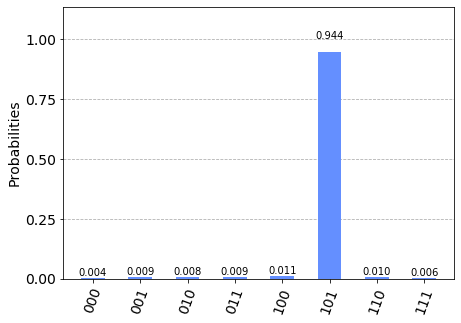

In [17]:
r = execute(g_101, backend=qasm).result()
plot_histogram(r.get_counts())

---

## Problem 5

Implement a Grover oracle for $n=3$ and $S = \{001, 111\}$. We'll refer to it by $U_{001,111}$

We want to implement the matrix for $U_{101}$:


\begin{equation}
\begin{bmatrix}
1 & & & & & & & \\
   & -1 & & & & & & \\
   & & 1 & & & &  & \\
   & & & 1  & & &  & \\
   & & &  & 1  & & & \\
   & & &  &  & 1  &  & \\
   & & &  &  & & 1 &  \\
   & & &  &  & & & -1  \\
\end{bmatrix}
=
\begin{bmatrix}
Z & & & \\
 & I & & \\
 & & I & \\
 & & & Z 
\end{bmatrix}
\end{equation}

### Solution:

In [18]:
u_001_111 = QuantumCircuit(3, name="U_001,111")

u_001_111.z(0);
u_001_111.cz(2,0);
u_001_111.cz(1,0);

u_001_111.draw('mpl')

In [19]:
r = execute(u_001_111, backend=unitary).result()
print(r.get_unitary(decimals=1))

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


---

## Problem 6

Using your solutions to Problems 2 and 5, implement Grover's algorithm for $n=3$ and $S = \{001,111\}$. Execute your circuit using the qasm simulator and observe the experimental results. What happens when you rotate more than once?

When you rotate twice or three times, the probabilities are distributed evenly. But a fourth time, the probabilities of success go back to being split between $001$ and $111$. More rotations show distributed results, until the 10th rotation, when things go back to the successful case (e.g. there is some pattern like 1 rotation, 4 rotations, 10 rotations -- all give success). I think this is because we rotate enough to sort of "loop" back around to where we started.

### Solution:

In [20]:
g_001_111 = QuantumCircuit(3,3)


g_001_111.h(0);
g_001_111.h(1);
g_001_111.h(2);

# rotation 1
g_001_111.append(u_001_111.to_instruction(),[0,1,2]);

g_001_111.append(u_s.to_instruction(),[0,1,2]);

g_001_111.measure([0,1,2],[0,1,2])

g_001_111.draw('mpl')

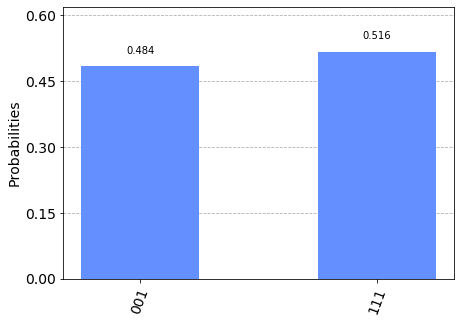

In [21]:
r = execute(g_001_111, backend=qasm).result()
plot_histogram(r.get_counts())

---

<div style="text-align:center;font-style:italic">End of exam</div>